# Data Cleaning Phase II

In this notebook, you will do the following:
* Section 1: Data Cleaning
* Section 2: Data Quality and Testing
* Section 3: Work Flow Model
* Section 4: Conclusion

## Section 1: Data Cleaning Steps
Data cleaning for this project was done with two tools, OpenRefine and Python. We used OpenRefine to trim whitespace and do data type conversions. We use Python for key constraints, empty/null values, outliers, and normalization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
plt.style.use('seaborn')
import os
import json

### OpenRefine: Dish dataset cleaning

**Step 1.1**

**Description:** We trim the whitespace from the dish name and we convert the prices to number values.

**Rationale:** Trimming the dish name whitespace will allow us to more accurately find duplicate dishes and better track prices over time. Converting prices to numbers will help us run calculations that can't be run on a string.

In [2]:
"""[
  {
    "op": "core/text-transform",
    "engineConfig": {
      "facets": [],
      "mode": "row-based"
    },
    "columnName": "name",
    "expression": "value.trim()",
    "onError": "keep-original",
    "repeat": false,
    "repeatCount": 10,
    "description": "Text transform on cells in column name using expression value.trim()"
  },
  {
    "op": "core/text-transform",
    "engineConfig": {
      "facets": [],
      "mode": "row-based"
    },
    "columnName": "lowest_price",
    "expression": "value.toNumber()",
    "onError": "keep-original",
    "repeat": false,
    "repeatCount": 10,
    "description": "Text transform on cells in column lowest_price using expression value.toNumber()"
  },
  {
    "op": "core/text-transform",
    "engineConfig": {
      "facets": [],
      "mode": "row-based"
    },
    "columnName": "highest_price",
    "expression": "value.toNumber()",
    "onError": "keep-original",
    "repeat": false,
    "repeatCount": 10,
    "description": "Text transform on cells in column highest_price using expression value.toNumber()"
  }
]"""

'[\n  {\n    "op": "core/text-transform",\n    "engineConfig": {\n      "facets": [],\n      "mode": "row-based"\n    },\n    "columnName": "name",\n    "expression": "value.trim()",\n    "onError": "keep-original",\n    "repeat": false,\n    "repeatCount": 10,\n    "description": "Text transform on cells in column name using expression value.trim()"\n  },\n  {\n    "op": "core/text-transform",\n    "engineConfig": {\n      "facets": [],\n      "mode": "row-based"\n    },\n    "columnName": "lowest_price",\n    "expression": "value.toNumber()",\n    "onError": "keep-original",\n    "repeat": false,\n    "repeatCount": 10,\n    "description": "Text transform on cells in column lowest_price using expression value.toNumber()"\n  },\n  {\n    "op": "core/text-transform",\n    "engineConfig": {\n      "facets": [],\n      "mode": "row-based"\n    },\n    "columnName": "highest_price",\n    "expression": "value.toNumber()",\n    "onError": "keep-original",\n    "repeat": false,\n    "repeatC

### OpenRefine: Menu Item Cleaning

**Step 1.2**

**Description:** We convert the prices to number values and we trim off the timestamp and convert the datestring to a date type.

**Rationale:** Converting prices and dates will help us run calculations that can't be run on a string. We trim times from menu item dates so that we can assess dish price with less granularity. This way we can group menu items by their date instead of having menu items all at different times.

In [3]:
"""[
  {
    "op": "core/text-transform",
    "engineConfig": {
      "facets": [],
      "mode": "row-based"
    },
    "columnName": "price",
    "expression": "value.toNumber()",
    "onError": "keep-original",
    "repeat": false,
    "repeatCount": 10,
    "description": "Text transform on cells in column price using expression value.toNumber()"
  },
  {
    "op": "core/text-transform",
    "engineConfig": {
      "facets": [],
      "mode": "row-based"
    },
    "columnName": "high_price",
    "expression": "value.toNumber()",
    "onError": "keep-original",
    "repeat": false,
    "repeatCount": 10,
    "description": "Text transform on cells in column high_price using expression value.toNumber()"
  },
  {
    "op": "core/text-transform",
    "engineConfig": {
      "facets": [],
      "mode": "row-based"
    },
    "columnName": "created_at",
    "expression": "grel:value[0,10]",
    "onError": "keep-original",
    "repeat": false,
    "repeatCount": 10,
    "description": "Text transform on cells in column created_at using expression grel:value[0,10]"
  },
  {
    "op": "core/text-transform",
    "engineConfig": {
      "facets": [],
      "mode": "row-based"
    },
    "columnName": "updated_at",
    "expression": "grel:value[0,10]",
    "onError": "keep-original",
    "repeat": false,
    "repeatCount": 10,
    "description": "Text transform on cells in column updated_at using expression grel:value[0,10]"
  },
  {
    "op": "core/text-transform",
    "engineConfig": {
      "facets": [],
      "mode": "row-based"
    },
    "columnName": "created_at",
    "expression": "value.toDate()",
    "onError": "keep-original",
    "repeat": false,
    "repeatCount": 10,
    "description": "Text transform on cells in column created_at using expression value.toDate()"
  },
  {
    "op": "core/text-transform",
    "engineConfig": {
      "facets": [],
      "mode": "row-based"
    },
    "columnName": "updated_at",
    "expression": "value.toDate()",
    "onError": "keep-original",
    "repeat": false,
    "repeatCount": 10,
    "description": "Text transform on cells in column updated_at using expression value.toDate()"
  }
]"""

'[\n  {\n    "op": "core/text-transform",\n    "engineConfig": {\n      "facets": [],\n      "mode": "row-based"\n    },\n    "columnName": "price",\n    "expression": "value.toNumber()",\n    "onError": "keep-original",\n    "repeat": false,\n    "repeatCount": 10,\n    "description": "Text transform on cells in column price using expression value.toNumber()"\n  },\n  {\n    "op": "core/text-transform",\n    "engineConfig": {\n      "facets": [],\n      "mode": "row-based"\n    },\n    "columnName": "high_price",\n    "expression": "value.toNumber()",\n    "onError": "keep-original",\n    "repeat": false,\n    "repeatCount": 10,\n    "description": "Text transform on cells in column high_price using expression value.toNumber()"\n  },\n  {\n    "op": "core/text-transform",\n    "engineConfig": {\n      "facets": [],\n      "mode": "row-based"\n    },\n    "columnName": "created_at",\n    "expression": "grel:value[0,10]",\n    "onError": "keep-original",\n    "repeat": false,\n    "repe

### Python: Data Cleaning

**Step 1.3**

**Description:** First we import the libraries we will be using and the datasets that we will be cleaning.

@BEGIN main
@PARAM file_path
@IN dish_data  @URI file:{file_path}/open_refine_cleaned/Dish.csv
@IN menu_item_data  @URI file:{file_path}/open_refine_cleaned/Menu-Item.csv
@OUT cleaned_dish_data  @URI file:{file_path}/dishcleaned.csv
@OUT cleaned_menu_item_data  @URI file:{file_path}/menu_item_cleaned.csv

In [5]:
import pandas as pd
import pytest

dish_df = pd.read_csv("../open_refine_cleaned/Dish.csv")
menu_item_df = pd.read_csv("../open_refine_cleaned/Menu-Item.csv")

**Step 1.4**

**Description:** We drop the rows that have an empty/null value for "price" and "created_at" columns.

**Rationale:** Our use case deals with comparing menu item prices throughout time, we can’t analyze menu items if the dates or prices of that item are null. Since we have enough data even when removing the empty values we decided to remove all of the empty values.

@BEGIN CleanPrice
@PARAM file_path
@IN Price @AS menu_item_data @URI file:{file_path}/open_refine_cleaned/Menu-Item.csv
@OUT data @AS menu_item_clean_price

In [6]:
menu_item_df.dropna(subset=['price'], inplace=True)
menu_item_df.dropna(subset=['created_at'], inplace=True)

@END CleanPrice

@BEGIN DishTitleCase
@PARAM file_path 
@IN title @AS dish_data @URI file:{file_path}/open_refine_cleaned/Dish.csv
@OUT data @AS dish_title_case

**Step 1.5**

**Description:** Convert the dish names to title case.

**Rationale:** Similar to trimming the dish names, converting the dish names to title case will allow us to more accurately detect duplipcates and merge them for better price tracking.

In [7]:
dish_df["name"] = dish_df["name"].str.title()

@END DishTitleCase

**Step 1.6**

**Description:** Find all dishes with the same name and grouping them together.
Setting all the duplicate dish menu items to the first dish id.
Removing all but the first dishes from the dish data set.

**Rationale:** Many dish names are similar/duplicates of each other, so they may be referring to the same food item, but under different dish_ids. We find these duplicates and merge them allowing us to have more data points per dish.

@BEGIN RemoveDuplicateDishes
@IN dish @AS dish_title_case
@OUT data @AS dish_unique

In [8]:
ids = dish_df["name"]
duped_name = dish_df[ids.isin(ids[ids.duplicated()])].sort_values("name")
duped_ids = duped_name.groupby(['name'])['id'].apply(lambda x: ','.join([str(y) for y in x])).reset_index()
ids_to_drop = []

for row in duped_ids.iterrows():
    dish_ids = row[1]["id"].split(",")
    first = int(dish_ids[0])
    for id in dish_ids[1:]:
        ids_to_drop.append(int(id))
        menu_item_df.loc[menu_item_df["dish_id"] == int(id), "dish_id"] = first
        
dish_df = dish_df[~dish_df['id'].isin(ids_to_drop)]

@END RemoveDuplicateDishes

**Step 1.7**

**Description:** Removing menu items that have prices outside the 10th-90th percentile.

**Rationale:** Removing outliers will allow us to more accurately analyze the changes in price over time. If a handful of dishes skyrocket in price, but they were a small part of all dishes, then that could skew the analysis. Therefore we removed all data points where the price was outside of the 10th-90th percentile.

@BEGIN RemoveOutliers
@IN Price @AS menu_item_clean_price
@OUT data @AS menu_item_valid_price

In [9]:
q_low = menu_item_df["price"].quantile(0.10)
q_hi  = menu_item_df["price"].quantile(0.90)
iqr = q_hi - q_low
mul = 2.0

menu_item_df = menu_item_df[(menu_item_df["price"] < q_hi + mul * iqr) & (menu_item_df["price"] > q_low - mul * iqr)]

@END RemoveOutliers

**Step 1.8**

**Description:** Use min-max normalization for the menu item prices.

**Rationale:** Normalizing the price data isn’t absolutely necessary for this investigation, but will help keep our data uniform and easy to read and understand.

@BEGIN NormalizePrice
@IN Price @AS menu_item_valid_price
@OUT data @AS menu_item_normalized_price

In [10]:
menu_item_df["price"] = (menu_item_df["price"] - menu_item_df["price"].min()) / (menu_item_df["price"].max() - menu_item_df["price"].min())

@END NormalizePrice

**Step 1.9**

**Description:** Removing menu items that don’t have a particular dish associated with it and removing dishes that have no menu items associated with it.

**Rationale:** If a menu item doesn't have an associated dish in the dish dataset, then we don’t want to consider it since that may be an invalid entry or it may not be possible to track its price over time.

@BEGIN RemoveOrphanDishes
@IN dish @AS dish_unique
@OUT data @AS dish_valid

In [11]:
dish_df = dish_df[dish_df['id'].isin(menu_item_df["dish_id"])]
menu_item_df = menu_item_df[menu_item_df['dish_id'].isin(dish_df["id"])]

@END RemoveOrphanDishes

@BEGIN RemoveOrphanMenuItems
@IN menu @AS menu_item_normalized_price
@OUT data @AS menu_items_valid
@END RemoveOrphanMenuItems

**Step 1.10**

**Description:** Standardizing the created_at into ISO format.

**Rationale:** In order to analyze the dish prices over time, we need a standard date format for the created_at field.

@BEGIN StandardizeDates
@IN menu @AS menu_items_valid
@OUT data @AS menu_items_std_date

In [12]:
menu_item_df['created_at'] = pd.to_datetime(menu_item_df['created_at'])


@END StandardizeDates

**Step 1.11**

**Description:** Write the cleaned data to files.

In [13]:
## Write cleaned data to files
dish_df.to_csv("../python_cleaned/Dish.csv", index=False)
menu_item_df.to_csv("../python_cleaned/Menu-Item.csv", index=False)

## Section 2: Document Data Quality Changes

**Description:** Run a series of tests to prove that the data quality has been improved.

**Rationale:** We compare and contrast the uncleaned versus the cleaned data.

In [ ]:
dish_df_uncleaned = pd.read_csv("../open_refine_cleaned/Dish.csv")
menu_item_df_uncleaned = pd.read_csv("../open_refine_cleaned/Menu-Item.csv")

**Step 2.1a**

**Description:** Provide a high level summary of the cleaned versus uncleaned data frames for the dish_df.

**Test Type:** Data Completeness

**Rationale:** We know that many dish names are similar/duplicates of each other, so they may be referring to the same food item, but under different dish_ids. We removed these duplicates, which would explain why the cleaned dish_df has 232,874 ids versus the uncleaned dish_df which has 423,397.

In [ ]:
dish_df_uncleaned.info()

In [ ]:
dish_df.info()

**Step 2.1b**

**Description:** Provide a high level summary of the cleaned versus uncleaned data frames for the menu_item_df.

**Test Type:** Data Completeness

**Rationale:** We dropped menu items that don't have an associated dish in the dish dataset, which would explain why the cleaned menu_item_df has 846,136 ids versus the uncleaned menu_item_df which has 1,332,726 ids.

In [ ]:
menu_item_df_uncleaned.info()

In [ ]:
menu_item_df.info()

**Step 2.2**

**Test Type:** Data Completeness

**Description:** Test to see if there are still missing dish prices.

**Rationale:** In step 1.4 we removed dishes with a null price, the following test will assure that there are no dishes with missing prices.

In [ ]:
def test_missing_dish_prices(menu_item_df):
    missing_dish_price = menu_item_df["price"].isnull().sum()
    assert (
        missing_dish_price == 0
    ), f"There are {missing_dish_price} missing dish prices"
    print('Test passed!')


In [ ]:
test_missing_dish_prices(menu_item_df)

**Step 2.3**

**Test Type:** Data Completeness

**Description:** Test to see if there are still missing created dates.

**Rationale:** Each item on the menu needs a created at date.

In [ ]:
def test_missing_created_dates(menu_item_df):
    missing_created_at = menu_item_df["created_at"].isnull().sum()
    assert (
        missing_created_at == 0
    ), f"There are {missing_created_at} missing created at date"
    print('Test passed!')

In [ ]:
test_missing_created_dates(menu_item_df)

**Step 2.4**

**Test Type:** Integrity Constraint Violations

**Description:** Test to see if there is a valid iso format for dates.

**Rationale:** In order to compare dish prices over time, the dates must be in the proper format.

In [ ]:
def test_created_at_datetime(menu_item_df):
    try:
        pd.to_datetime(menu_item_df['created_at'])
        is_datetime = True
    except ValueError:
        is_datetime = False
    assert (
        is_datetime
    ), f"'created_at' column is of type {menu_item_df['created_at'].dtype}, and couldn't be converted to datetime"
    print('Test passed!')


In [ ]:
menu_item_df.head()

In [ ]:
test_created_at_datetime(menu_item_df)

**Step 2.5**

**Test Type:** Integrity Constraint Violations

**Description:** Test to see if are no duplicate dish names.

**Rationale:** In order to compare dishes properly, we need to remove duplicates.  We did this in step 1.6 in python.

In [ ]:
# Test function to check for duplicate names
def test_no_duplicate_names(dish_df):
    duplicate_names = dish_df.groupby(["name"])["name"].count()
    num_duplicate_names = duplicate_names[duplicate_names > 1].count()

    assert (
        num_duplicate_names == 0
    ), f"There are {num_duplicate_names} duplicate dish names"
    print('Test passed!')

In [ ]:
test_no_duplicate_names(dish_df)

**Step 2.6**

**Test Type:** Integrity Constraint Violations

**Description:** Test to ensure there are no leading or trailing whitespaces.

**Rationale:** In order to compare dishes properly, we need to remove duplicates.  We did this in step 1.1 with OpenRefine.

In [ ]:
def test_no_leading_trailing_whitespace(dish_df):
    dirty_dish_names = (
        dish_df["name"].apply(lambda x: isinstance(x, str) and (x.strip() != x)).sum()
    )

    assert (
        dirty_dish_names == 0
    ), f"There are {dirty_dish_names} dish names with leading and trailing whitespace"
    print('Test passed!')

In [ ]:
test_no_leading_trailing_whitespace(dish_df)

**Step 2.7**

**Test Type:** Integrity Constraint Violations

**Description:** Test to ensure dish names are formatted consistently with title case.

**Rationale:** In order to compare dishes properly, we need each name to be in title case.  We did this in step 1.5 in python.

In [ ]:
def test_name_consistent_format(dish_df):
    inconsistent_format_count = 0

    for name in dish_df["name"]:
        if not isinstance(name, str):
            # check if the data is of type string
            inconsistent_format_count += 1
        elif name != name.title():
            # check if the name is in title case
            inconsistent_format_count += 1

    assert (
        inconsistent_format_count == 0
    ), f"There are {inconsistent_format_count} names with inconsistent format"
    print('Test passed!')

In [ ]:
test_name_consistent_format(dish_df)

**Step 2.8**

**Test Type:** Consistency

**Description:** Test to ensure that outliers have been removed.

**Rationale:** In order to avoid data skewing we need to remove outliers.  We removed outliers in section 1.7.

In [ ]:
def outliers_removed(olddataframe, dataframe, column_name, multiplier=1.5):
    Q1 = olddataframe[column_name].quantile(0.10)
    Q3 = olddataframe[column_name].quantile(0.90)
    IQR = Q3 - Q1

    # Count the number of outliers
    outliers = dataframe[
        (dataframe[column_name] < Q1 - multiplier * IQR)
        | (dataframe[column_name] > Q3 + multiplier * IQR)
    ]
    outliers_count = outliers.shape[0]

    assert outliers_count == 0, f"There are {outliers_count} outliers in {column_name}"

def test_menu_item_price_outliers(old_menu_item_df, menu_item_df):
    outliers_removed(old_menu_item_df, menu_item_df, "price", multiplier=2.0)
    print('test passed')

In [ ]:
test_menu_item_price_outliers(menu_item_df_uncleaned, menu_item_df)

In [ ]:
menu_item_df_uncleaned.price.describe()

In [ ]:
menu_item_df.price.describe()

**Step 2.9**

**Test Type:** Consistency

**Description:** Test to ensure that the data has min-max normalization.

**Rationale:** The price needs to be on the same scale so that each item is equally weighted.

In [ ]:
def test_price_normalization(menu_item_df):
    min_price = menu_item_df['price'].min()
    max_price = menu_item_df['price'].max()
    
    assert min_price == 0, f"Minimum price is {min_price}, expected 0 after normalization"
    assert max_price == 1, f"Maximum price is {max_price}, expected 1 after normalization"
    
    # To additionally check if there are any values outside the [0,1] range
    assert not ((menu_item_df['price'] < 0).any() or (menu_item_df['price'] > 1).any()), "There are 'price' values outside the [0,1] range after normalization"
    
    print('Test passed!')


In [ ]:
test_price_normalization(menu_item_df)


## Section 3: Work Flow Model

Step 3.1

Yes Workflow Step: Dish Open Refine cleaning workflow

Description: Generate Yes Workflow for Open Refine cleaning steps performed on dish dataset

In [7]:
os.popen("or2yw -i dish_history.json -o ../yesworkflow/dish_openrefine_workflow.png -ot=png").read()

'java found:  java\ndot found:  dot\nFile ../yesworkflow/dish_openrefine_workflow.png generated.\n'

In [24]:
os.popen("or2yw -i dishhistoryjson -o ../yesworkflow/dish_openrefine_workflow.png -ot=png").read()

'usage: or2yw [-h] [-i INPUT] [-o OUTPUT] [-t TYPE] [-ot OUTPUTTYPE]\n             [-java JAVA] [-dot DOT] [-title TITLE] [-desc DESCRIPTION]\n\nOR2YW v0.0.15\n\noptional arguments:\n  -h, --help            show this help message and exit\n  -i INPUT, --input INPUT\n                        openrefine json file\n  -o OUTPUT, --output OUTPUT\n                        yesworkflow output file\n  -t TYPE, --type TYPE  Workflow Type, Produce [serial,parallel,merge]\n                        workflow, Default: serial\n  -ot OUTPUTTYPE, --outputtype OUTPUTTYPE\n                        Output Type, Produce output [yw,gv,png,svg,pdf],\n                        Default: yw\n  -java JAVA, --java JAVA\n                        Java Path, if not initialized will use the java\n                        installation environment path\n  -dot DOT, --dot DOT   Dot Path, if not initialized will use the dot\n                        installation environment path\n  -title TITLE, --title TITLE\n                   

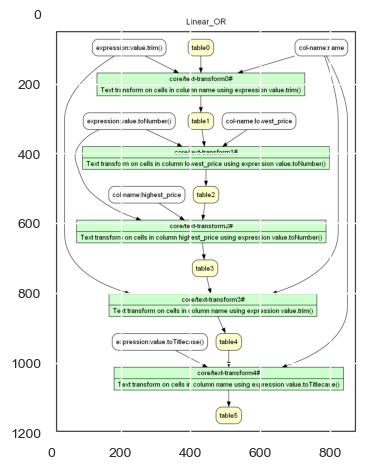

In [8]:
# reading png image file
im = img.imread('../yesworkflow/dish_openrefine_workflow.png')
# show image
plt.imshow(im)

Step 3.2

Yes Workflow Step: Menu Item Open Refine cleaning workflow

Description: Generate Yes Workflow for Open Refine cleaning steps performed on menu_item dataset

In [9]:
os.popen("or2yw -i menu_item_history.json -o ../yesworkflow/menu_item_workflow.png -ot=png").read()

'java found:  java\ndot found:  dot\nFile ../yesworkflow/menu_item_workflow.png generated.\n'

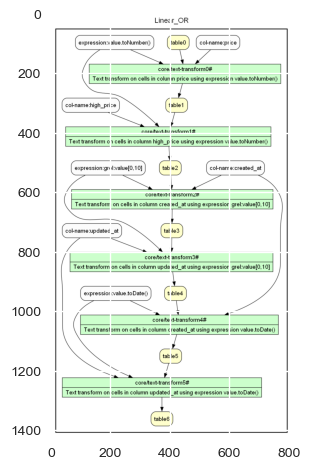

In [10]:
# reading png image file
im = img.imread('../yesworkflow/menu_item_workflow.png')
# show image
plt.imshow(im)

In [ ]:
Step 3.2

Yes Workflow Step: Final Cleaning workflow for Dish and Menu Item 

Description: Generate Yes Workflow for python cleaning steps performed on dish and menu_item dataset

In [5]:
os.popen("java -jar yesworkflow-0.2.0-jar-with-dependencies.jar graph data_cleaning_phase_II.py | dot -Tpng -o ../yesworkflow/dish_menu_clean_workflow.png").read()

''

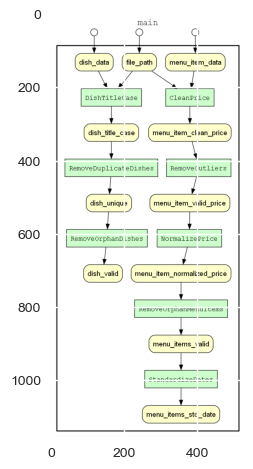

In [4]:
# reading png image file
im = img.imread('../yesworkflow/dish_menu_clean_workflow.png')
# show image
plt.imshow(im)

## Section 4: Conclusion

In Phase II of the project, we focused on data cleaning to address the data quality problems identified in the dataset. We successfully executed test cases to ensure the data is clean and ready for analysis in the main use case - Dish Price Analysis (U1). The initial data quality problems related to missing data, dirty data, key constraints, and duplicates/similarities were addressed using various data cleaning techniques.

For the main use case, we specifically focused on data related to dish prices, including the 'price', 'highest price', 'lowest price', and 'created at' fields. We ensured that the dataset has no missing dish prices, no NULL values in any columns, and outliers were removed. Additionally, we standardized data formats to ensure consistency, trimmed leading and trailing whitespaces from dish names, and removed duplicate dish names.

Through this comprehensive data cleaning process, we have enhanced the quality of the dataset, ensuring it is accurate, reliable, and suitable for the Dish Price Analysis (U1) use case. This allows us to proceed with further data analysis and gain valuable insights into historical changes in dish prices over time. The clean and structured dataset will enable us to provide meaningful recommendations.

In phase 2 the team made the following contributions:

- Section 1 - Mohammed
- Section 2 - David
- Section 3 - Jhansi
- Section 4 - All


@END main